<b>
<p>
<center>
<font size="5">
Machine Learning, Kaggle Competition Poker Cards:
</font>
</center>
</p>


# Overview

- Here we will work on kaggle competation [Poker Rule Induction dataset](https://www.kaggle.com/c/poker-rule-induction).

- Reference for functions:
https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/pmlm_utilities_shallow.ipynb

- Pipeline

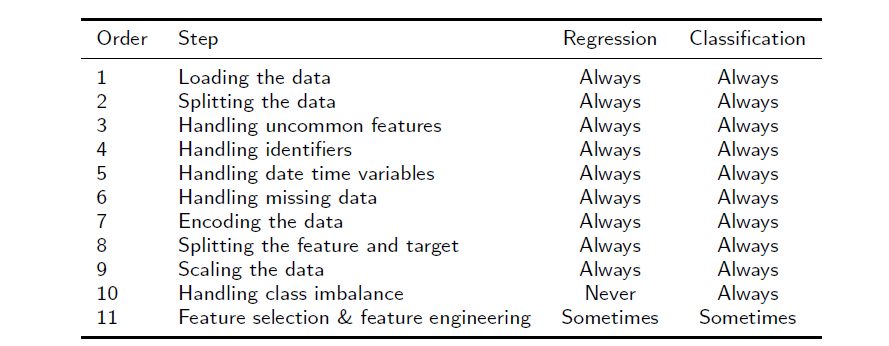


# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning


In [ ]:
# Implement me
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + '/dataset/Poker_Rule/train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + '/dataset/Poker_Rule/test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

In [ ]:
df_raw_train['hand'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: hand, dtype: int64

In [ ]:
df_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


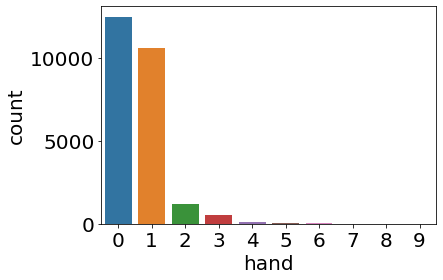

In [ ]:
import seaborn as sns
sns.countplot(data = df_train, x= 'hand')

In [ ]:
target = 'hand'

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,25010,11


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1000000,11


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,20008,11


In [ ]:
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,5002,11


In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,C1
1,C2
2,C3
3,C4
4,C5
5,S1
6,S2
7,S3
8,S4
9,S5


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature
0,id


In [ ]:
df_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,2,2,4,4,3,3,5,1,10,0
1,1,10,4,5,4,1,4,9,4,10,1
2,1,7,2,11,1,5,3,12,4,5,1
3,2,12,1,8,4,13,4,3,1,4,0
4,2,5,3,13,2,7,3,12,1,4,0


In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,2,2,4,4,3,3,5,1,10,0
1,1,10,4,5,4,1,4,9,4,10,1
2,1,7,2,11,1,5,3,12,4,5,1
3,2,12,1,8,4,13,4,3,1,4,0
4,2,5,3,13,2,7,3,12,1,4,0


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,3,4,3,8,3,2,1,3,3,7,0
1,4,13,2,7,4,3,3,13,2,1,1
2,4,10,2,12,2,9,2,5,1,11,0
3,2,8,4,8,3,9,4,7,4,5,1
4,1,11,4,9,1,2,2,1,4,3,0


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,2,2,3,3,3,8,1,1
1,2,13,3,5,3,7,4,6,1,4
2,1,3,1,11,2,8,2,1,2,4
3,1,6,3,3,4,7,1,8,3,11
4,2,10,3,4,1,6,2,12,2,6


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,2,2,4,4,3,3,5,1,10,0
1,1,10,4,5,4,1,4,9,4,10,1
2,1,7,2,11,1,5,3,12,4,5,1
3,2,12,1,8,4,13,4,3,1,4,0
4,2,5,3,13,2,7,3,12,1,4,0


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,3,4,3,8,3,2,1,3,3,7,0
1,4,13,2,7,4,3,3,13,2,1,1
2,4,10,2,12,2,9,2,5,1,11,0
3,2,8,4,8,3,9,4,7,4,5,1
4,1,11,4,9,1,2,2,1,4,3,0


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,2,2,3,3,3,8,1,1
1,2,13,3,5,3,7,4,6,1,4
2,1,3,1,11,2,8,2,1,2,4
3,1,6,3,3,4,7,1,8,3,11
4,2,10,3,4,1,6,2,12,2,6


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,hand,0.9756,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,hand,0.9756,float64


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,20008,11


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5002,11


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1000000,11


In [ ]:
df_miss

,var,proportion,dtype
0,hand,0.9756,float64


In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,float64


In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,2,2,4,4,3,3,5,1,10,0.0
1,1,10,4,5,4,1,4,9,4,10,1.0
2,1,7,2,11,1,5,3,12,4,5,1.0
3,2,12,1,8,4,13,4,3,1,4,0.0
4,2,5,3,13,2,7,3,12,1,4,0.0


In [ ]:
df['hand'].unique()

array([0., 1., 2., 3., 5., 4., 8., 7., 6., 9.])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target])

# Print the first 5 rows of df
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,2,2,4,4,3,3,5,1,10,0
1,1,10,4,5,4,1,4,9,4,10,1
2,1,7,2,11,1,5,3,12,4,5,1
3,2,12,1,8,4,13,4,3,1,4,0
4,2,5,3,13,2,7,3,12,1,4,0


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,20008,11


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5002,11


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1000000,11


In [ ]:
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06,1.025010e+06
mean,2.500695e+00,6.997861e+00,2.499841e+00,7.006295e+00,2.501100e+00,6.999246e+00,2.500284e+00,7.000838e+00,2.499399e+00,6.988828e+00,1.515595e-02
std,1.117737e+00,3.743529e+00,1.118646e+00,3.744054e+00,1.118345e+00,3.741964e+00,1.117215e+00,3.741423e+00,1.118942e+00,3.739936e+00,1.560404e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00
50%,3.000000e+00,7.000000e+00,2.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00
75%,3.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,3.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,0.000000e+00
max,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,9.000000e+00


In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

# Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models = {
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
param_grids = {}


In [ ]:
# import numpy as np

# learning_rate = [0.01,0.02,0.03,0.04]
# max_depth = [10, 20, 30, 40, 50]
# n_estimators = [10,30,100]
# eval_metric =  ["logloss", "error"]
# min_child_weight = [1, 2, 3]
# subsample = [0.5, 1.0]
# objective= ['multi:softmax']


# param_grids['xgb'] = [{
#     'model__max_depth': max_depth,
#     'model__n_estimators': n_estimators,
#     'model__learning_rate': learning_rate,
#     'model__min_child_weight':min_child_weight,
#     'model__eval_metric':eval_metric,
#     'model__subsample':subsample,
#     'model__objective':objective}]


In [ ]:
# # The parameter grid of tol
# tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# # The parameter grid of C
# C_grid = [0.1, 1, 10]

# # Update param_grids
# param_grids['lr'] = [{'model__tol': tol_grid,
#                       'model__C': C_grid}]

In [ ]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/Poker/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/Poker/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.149751,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(alpha=1e-05, early_stopping=Tru..."


# Model Selection

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/Poker/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
#y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((np.arange(1, y_test_pred.shape[0] + 1).reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target]).astype({'id':int, target:int})                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submissionpoker.csv', index=False)                                                                              

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = best_estimator_gs.predict(X_train)

# Get the precision, recall, f-score and support
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred, average='micro')


In [ ]:
pd.DataFrame([[precision, recall, fscore]], columns=['precision', 'recall', 'f-score'])


,precision,recall,f-score
0,0.686675,0.686675,0.686675


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average='macro')

0.33732393436421687